In [1]:
import os
import sys
sys.path.append(os.path.join('..'))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

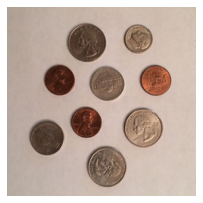

In [2]:
fname = os.path.join('..', 'data', 'img', 'coins.png')
image = cv2.imread(fname)
jimshow(image)

__Make grayscale__

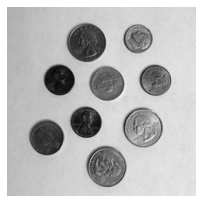

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

jimshow_channel(gray_image)

## Sobel operators

In [4]:
# image, bitmode (64bit floats - we need signed, negative vals), horizontal, vertical
# return val is the image after the operation has been performed
sobelX = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0) 
sobelY = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1)

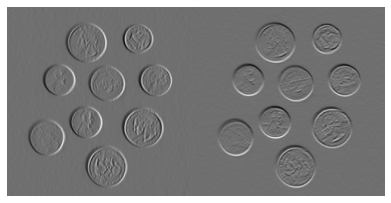

In [5]:
jimshow_channel(np.hstack((sobelX, sobelY)))

In [6]:
# convert to uint8 (absolute values) makes the darker and lighter edges all be edges
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

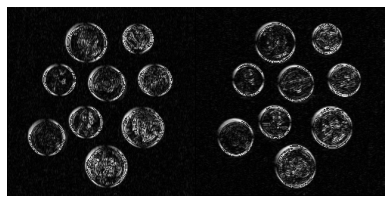

In [7]:
sobel_edges = np.hstack((sobelX, sobelY))
jimshow_channel(sobel_edges)

In [8]:
# combine edges where either sobelX or sobelY says there is one
sobel_combined = cv2.bitwise_or(sobelX, sobelY)

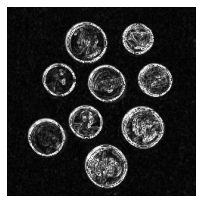

In [9]:
jimshow_channel(sobel_combined)

## Laplacian operator

In [11]:
laplace = cv2.Laplacian(gray_image, cv2.CV_64F)
laplace = np.uint8(np.absolute(laplace))

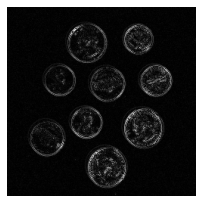

In [13]:
jimshow_channel(laplace)

## Canny edge detection

In [15]:
blurred = cv2.GaussianBlur(gray_image, (5,5), 0)

In [72]:
canny = cv2.Canny(blurred, 30, 150)

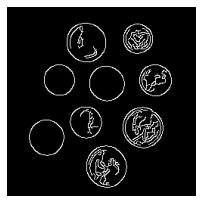

In [73]:
jimshow_channel(canny)

## Finding contours

In [82]:
contours, _ = canny_contour = cv2.findContours(canny.copy(),
                 cv2.RETR_EXTERNAL,
                 cv2.CHAIN_APPROX_SIMPLE)

## Drawing contours
`cv2.drawContours(image, contours, contour_num (-1 for all), colour, thickness`

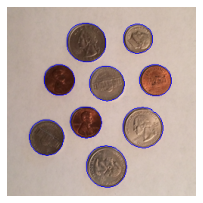

In [97]:
# show contours on original image
jimshow(cv2.drawContours(image.copy(),
                         contours,
                         -1,
                         (255,0,0),
                         1))